# DUOLINGO CUSTOMER SEGMENTATION PROJECT

In [1]:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
survey_data = pd.read_csv('Downloads//survey_data.csv')
survey_users_app_usage = pd.read_csv('Downloads//survey_users_app_usage.csv')

In [3]:
data = survey_data.merge(survey_users_app_usage,how='left',on='user_id') 

In [4]:
# DATA CLEANING 
data = data.dropna(subset=['user_id'])
#Removing values where respondant took less than 5 seconds to respondant, to remove casual responses
data = data[data['time_spent_seconds'].to_numpy() > 5]

## K-MEANS CLUSTERING

In [5]:
#Normaliing data
data_copy = data[['longest_streak', 'n_active_days', 'n_lessons_completed']].fillna(0)
data_rank = data_copy.rank(method='first')
data_normalized = (data_rank - data_rank.mean()) / data_rank.std()
data_normalized.head()

,longest_streak,n_active_days,n_lessons_completed
0,1.563502,1.117434,0.541735
1,0.240582,0.186805,-0.430784
2,0.304549,-0.302851,-0.790808
3,0.466447,1.253858,1.658036
4,1.320089,0.848548,0.641930


In [6]:
# Import packages
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import metrics 
from scipy.spatial.distance import cdist

# Calculate Silhouette coefficients for different k
for n_cluster in [2, 3, 4, 5, 6, 7, 8]:
    kmeans = KMeans(n_clusters=n_cluster,
                    max_iter=400,
                    n_init=20).fit(data_normalized[['longest_streak',
                                                  'n_active_days',
                                                  'n_lessons_completed']])
    silhouette_avg = silhouette_score(data_normalized[['longest_streak',
                                                     'n_active_days',
                                                     'n_lessons_completed']],
                                      kmeans.labels_) 
    print('Silhouette coefficient for %i clusters: %0.3f' % (n_cluster, silhouette_avg))

Silhouette coefficient for 2 clusters: 0.540
Silhouette coefficient for 3 clusters: 0.436
Silhouette coefficient for 4 clusters: 0.373
Silhouette coefficient for 5 clusters: 0.371
Silhouette coefficient for 6 clusters: 0.340
Silhouette coefficient for 7 clusters: 0.334
Silhouette coefficient for 8 clusters: 0.338


In [7]:
kmeans = KMeans(n_clusters=3,
                max_iter=400,
                n_init=20).fit(data_normalized[['longest_streak',
                                                     'n_active_days',
                                                     'n_lessons_completed']])

# Get centres of the clusters
data_cluster_centres = pd.DataFrame(kmeans.cluster_centers_, columns=['longest_streak',
                                                     'n_active_days',
                                                     'n_lessons_completed'])
data_cluster_centres['Cluster'] = data_cluster_centres.index

# Mark each customer with its cluster
data_two_clusters = data_normalized[['longest_streak',
                                    'n_active_days',
                                    'n_lessons_completed']].copy(deep=True)
data_two_clusters['Cluster'] = kmeans.labels_
data_two_clusters.head()

,longest_streak,n_active_days,n_lessons_completed,Cluster
0,1.563502,1.117434,0.541735,0
1,0.240582,0.186805,-0.430784,2
2,0.304549,-0.302851,-0.790808,2
3,0.466447,1.253858,1.658036,0
4,1.320089,0.848548,0.641930,0


In [8]:
data_cluster_centres

,longest_streak,n_active_days,n_lessons_completed,Cluster
0,1.040691,1.040641,0.888664,0
1,-1.121933,-1.125889,-1.132375,1
2,-0.060678,-0.056483,0.130440,2


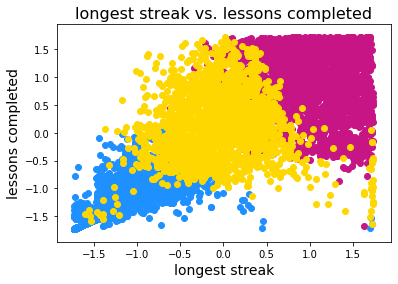

In [9]:
# VISUALIZING OUR CLUSTERS
plt.scatter(data_two_clusters.loc[data_two_clusters['Cluster'] == 0]['longest_streak'], 
            data_two_clusters.loc[data_two_clusters['Cluster'] == 0]['n_lessons_completed'],
            c='mediumvioletred');

plt.scatter(data_two_clusters.loc[data_two_clusters['Cluster'] == 1]['longest_streak'], 
            data_two_clusters.loc[data_two_clusters['Cluster'] == 1]['n_lessons_completed'],
            c='dodgerblue');

plt.scatter(data_two_clusters.loc[data_two_clusters['Cluster'] == 2]['longest_streak'], 
            data_two_clusters.loc[data_two_clusters['Cluster'] == 2]['n_lessons_completed'],
            c='gold');
plt.title('longest streak vs. lessons completed', fontsize=16);
plt.xlabel('longest streak', fontsize=14);
plt.ylabel('lessons completed', fontsize=14);

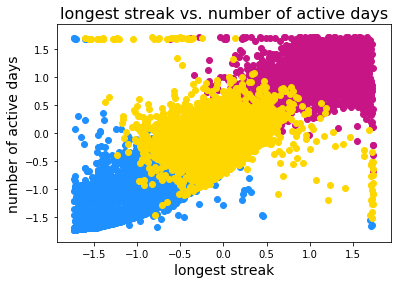

In [10]:
plt.scatter(data_two_clusters.loc[data_two_clusters['Cluster'] == 0]['longest_streak'], 
            data_two_clusters.loc[data_two_clusters['Cluster'] == 0]['n_active_days'],
            c='mediumvioletred');

plt.scatter(data_two_clusters.loc[data_two_clusters['Cluster'] == 1]['longest_streak'], 
            data_two_clusters.loc[data_two_clusters['Cluster'] == 1]['n_active_days'],
            c='dodgerblue');

plt.scatter(data_two_clusters.loc[data_two_clusters['Cluster'] == 2]['longest_streak'], 
            data_two_clusters.loc[data_two_clusters['Cluster'] == 2]['n_active_days'],
            c='gold');
plt.title('longest streak vs. number of active days', fontsize=16);
plt.xlabel('longest streak', fontsize=14);
plt.ylabel('number of active days', fontsize=14);

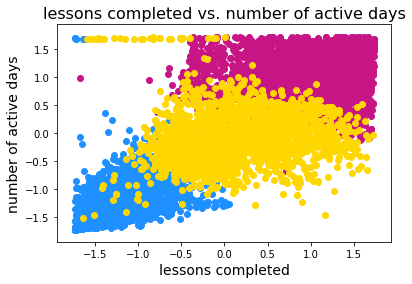

In [11]:
plt.scatter(data_two_clusters.loc[data_two_clusters['Cluster'] == 0]['n_lessons_completed'], 
            data_two_clusters.loc[data_two_clusters['Cluster'] == 0]['n_active_days'],
            c='mediumvioletred');

plt.scatter(data_two_clusters.loc[data_two_clusters['Cluster'] == 1]['n_lessons_completed'], 
            data_two_clusters.loc[data_two_clusters['Cluster'] == 1]['n_active_days'],
            c='dodgerblue');

plt.scatter(data_two_clusters.loc[data_two_clusters['Cluster'] == 2]['n_lessons_completed'], 
            data_two_clusters.loc[data_two_clusters['Cluster'] == 2]['n_active_days'],
            c='gold');
plt.title('lessons completed vs. number of active days', fontsize=16);
plt.xlabel('lessons completed', fontsize=14);
plt.ylabel('number of active days', fontsize=14);

OBSERVATIONS:  
We recognize that there are three main clusters-  
1 . CLUSTER a : Highly motivated users who are active, complete their daily goals and complete more courses.  
2 . CLUSTER b : Less motivated users who are less active, have inconsistency in meeting their daily goals, and have done less courses.  
3 . CLUSTER c : Users who are less active on a daily basis, but still complete more courses than average.  

## ADDITIONAL ANALYSIS

### 1. ANALYSIS ON USERS WITH SUBSCRIPTION

In [12]:
users_with_subsciptions= data[data['purchased_subscription']==True]

#### SALARY

In [13]:
users_with_subsciptions.groupby('annual_income')['n_active_days'].describe()

,count,mean,std,min,25%,50%,75%,max
annual_income,,,,,,,,
"$0 - $10,000",299.0,63.899666,35.875857,2.0,32.0,76.0,90.0,286.0
"$11,000 - $25,000",269.0,66.193309,33.268578,4.0,41.0,77.0,91.0,260.0
"$151,000 or more",211.0,74.729858,32.951451,3.0,58.5,86.0,93.0,289.0
"$26,000 - $75,000",553.0,73.511754,35.485815,2.0,53.0,85.0,93.0,289.0
"$76,000 - $150,000",325.0,71.544615,32.524663,1.0,51.0,82.0,92.0,257.0


OBSERVATIONS:  
1 . Users with subscription who have higher salaries are more likely to be active on the platform (~ 74 days)  than those with lower salaries (~63-66 days).

#### AGE

In [14]:
users_with_subsciptions.groupby('age')['n_active_days'].describe()

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
18-34,435.0,59.494253,35.318392,2.0,29.00,64.0,88.0,278.0
35 - 54,668.0,73.008982,35.400471,3.0,51.75,83.5,92.0,289.0
55 - 74,662.0,75.972810,32.465401,1.0,60.25,86.0,94.0,289.0
75 or older,63.0,76.492063,23.223926,19.0,64.50,88.0,94.0,95.0
Under 18,30.0,59.300000,29.640548,5.0,32.25,71.5,83.0,94.0


OBSERVATIONS:  
1 .  Users under 18, mostly don't purchase the subscription (only 30 users under 18 have subscriptions). This makes sense as they are most likely minors who yet don't earn money.  
2 .  The younger age categories (Under 18 and 18-34) who purchase a subscription, seem to be less active on average (around ~59 days) than the older age categories (35 +) who seem to be active for around ~75 days on average. 


### 2. ANALYSIS ON LEVEL OF PROFICIENCY vs  USAGE

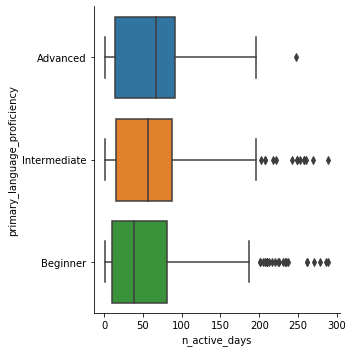

In [15]:
proficiency_vs_usage = sns.catplot(x="n_active_days", y="primary_language_proficiency", kind="box", data=data)
proficiency_vs_usage;

OBSERVATIONS:  
1 . Users with a beginner-level of proficiency in the primary language are less active on Duolingo and advanced users are more active.


 ### 3.  ANALYSIS ON OTHER RESOURCES USED BY USERS

In [16]:
other_resources=data.groupby('other_resources').count()[['user_id']]
other_resources=other_resources.sort_values(by = 'user_id', ascending = False).head(10)
other_resources

,user_id
other_resources,
Movies/TV Shows,549
Textbooks,368
Other apps,344
Other (please specify),272
"Speak with others (language events, conversation groups, meet-ups, etc.)",245
In-person language class,235
Online language class,135
Stories/novels/children's books,107
"Textbooks,Movies/TV Shows",105


### 4. ANALYSIS ON INCOMPLETE COURSES

In [17]:
data_by_age=data.groupby('age').mean()

# No. of incomplete courses
data_by_age['n_lessons_started']-data_by_age['n_lessons_completed']

age
18-34          10.729810
35 - 54        17.698552
55 - 74        22.085149
75 or older    25.728682
Under 18        8.909677
dtype: float64

### 5. ANALYSIS ON CUSTOMER RETENTION AND PROMOTION

In [18]:
pivot = data.pivot_table(index=['purchased_subscription'],columns=['future_contact'],values=['user_id'], aggfunc='count').fillna(0)
pivot

user_id      
future_contact              No   Yes
purchased_subscription              
False                      773  2790
True                       169  1600